# Predict sales of a Product

##  Develop time series forecasting models to predict sales of a product..

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"perrin-freres-monthly-champagne-.csv")

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.columns

Index(['Month', 'Perrin Freres monthly champagne sales millions ?64-?72'], dtype='object')

In [5]:
df.columns=['Month','Sales']

In [6]:
df.columns

Index(['Month', 'Sales'], dtype='object')

In [7]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [8]:
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

In [11]:
 df.dtypes

Month     object
Sales    float64
dtype: object

In [12]:
df.shape

(105, 2)

In [13]:
df['Month']=pd.to_datetime(df['Month'])
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [14]:
df.set_index('Month',inplace=True)

In [15]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [16]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Visualise the sales column

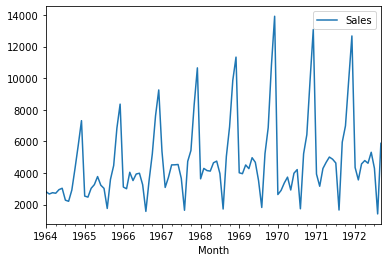

In [17]:
df.plot()

## check stationary 

In [18]:
from statsmodels.tsa.stattools import adfuller


In [19]:
def adfuller_test(Sales):
    labels=['adf','pvalue','usedlag','nobs ']
    result=adfuller(Sales)
    for label,value in zip(labels,result):
        print("{} : {} ".format(label,value))
    if result[1]<=.5:
        print(result[1])
        print("data is stationary")
    else:
        print("data is Not stationary")
adfuller_test(df['Sales'])

adf : -1.8335930563276237 
pvalue : 0.3639157716602447 
usedlag : 11 
nobs  : 93 
0.3639157716602447
data is stationary


## Data differencing

In [20]:
df['sales first difference']=df['Sales']-df['Sales'].shift(1)

In [21]:
df['seasonal sales first difference']=df['Sales']-df['Sales'].shift(12)

In [22]:
df.head()

,Sales,sales first difference,seasonal sales first difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [23]:
adfuller_test(df['seasonal sales first difference'].dropna())

adf : -7.626619157213163 
pvalue : 2.060579696813685e-11 
usedlag : 0 
nobs  : 92 
2.060579696813685e-11
data is stationary


In [28]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
import matplotlib.pyplot as plt

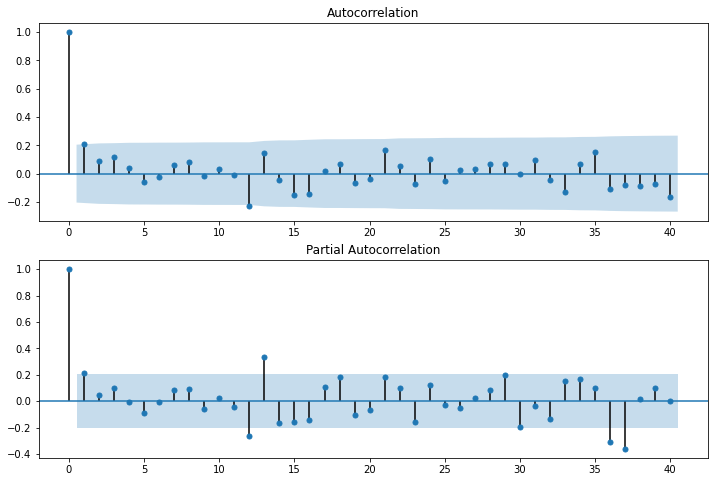

In [31]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(df['seasonal sales first difference'].iloc[13:],lags=40,ax=ax1)

ax2=fig.add_subplot(212 )
fig=plot_pacf(df['seasonal sales first difference'].iloc[13:],lags=40,ax=ax2)

In [32]:
from statsmodels.tsa.arima_model import ARIMA

In [38]:
model=ARIMA(df['Sales'],order=(1,1,1))
model=model.fit()

/Users/shanajames/Documents/anaconda3/envs/TensorFlow2/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/shanajames/Documents/anaconda3/envs/TensorFlow2/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: 

In [39]:

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Thu, 20 May 2021   AIC                           1910.251
Time:                        13:35:06   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7831     12.405      1.837      0.066      -1.531      47.097
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [40]:
df['forecast']=model.predict(start=90,end=103,dynamic=True)

In [41]:
df.tail(20)

,Sales,sales first difference,seasonal sales first difference,forecast
Month,,,,
1971-02-01,3162.0,-772.0,263.0,NaN
1971-03-01,4286.0,1124.0,916.0,NaN
1971-04-01,4676.0,390.0,936.0,NaN
1971-05-01,5010.0,334.0,2083.0,NaN
1971-06-01,4874.0,-136.0,888.0,NaN
1971-07-01,4633.0,-241.0,416.0,473.036184
1971-08-01,1659.0,-2974.0,-79.0,218.348570
1971-09-01,5951.0,4292.0,730.0,107.726113
1971-10-01,6981.0,1030.0,557.0,59.677731


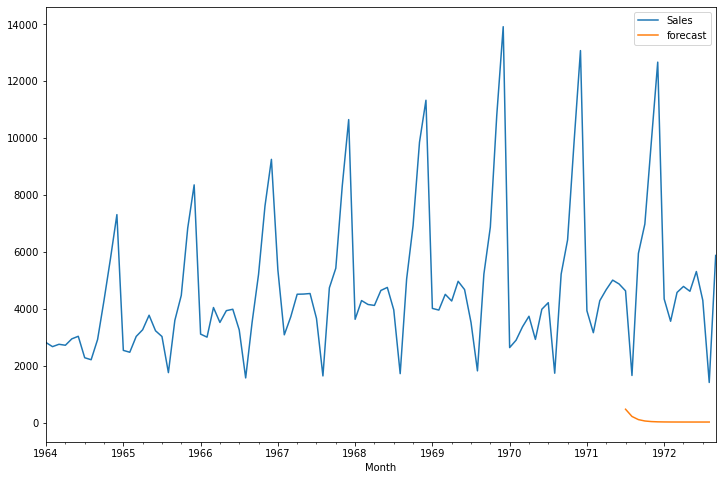

In [42]:
df[['Sales','forecast']].plot(figsize=(12,8))

In [44]:
import statsmodels.api as sm

In [49]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))

/Users/shanajames/Documents/anaconda3/envs/TensorFlow2/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/shanajames/Documents/anaconda3/envs/TensorFlow2/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [50]:
results=model.fit()

In [51]:
df['forecast_SARIMAX']=results.predict(start=90,end=103,dynamic=True)

In [52]:
df.tail(20)

,Sales,sales first difference,seasonal sales first difference,forecast,forecast_SARIMAX
Month,,,,,
1971-02-01,3162.0,-772.0,263.0,NaN,NaN
1971-03-01,4286.0,1124.0,916.0,NaN,NaN
1971-04-01,4676.0,390.0,936.0,NaN,NaN
1971-05-01,5010.0,334.0,2083.0,NaN,NaN
1971-06-01,4874.0,-136.0,888.0,NaN,NaN
1971-07-01,4633.0,-241.0,416.0,473.036184,4437.325216
1971-08-01,1659.0,-2974.0,-79.0,218.348570,2050.747752
1971-09-01,5951.0,4292.0,730.0,107.726113,5493.376673
1971-10-01,6981.0,1030.0,557.0,59.677731,6752.038769


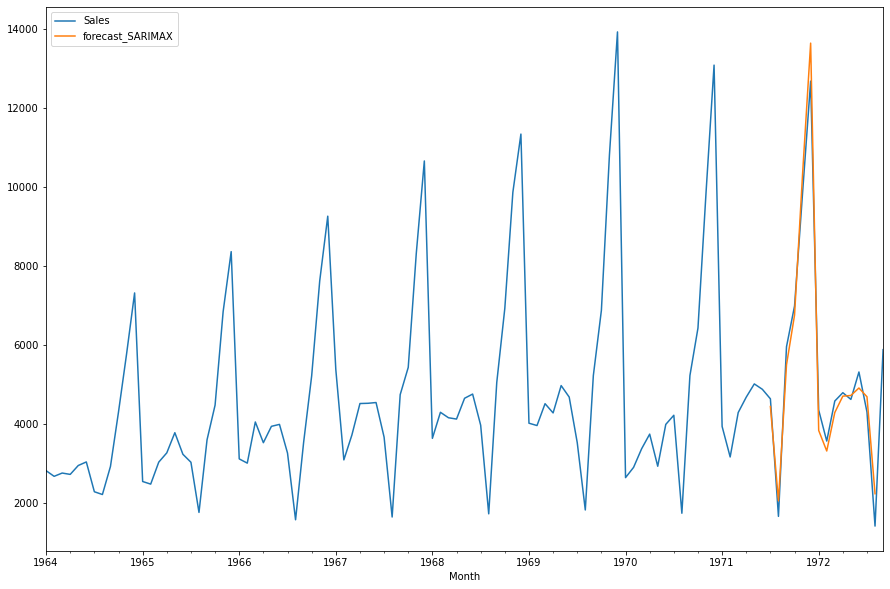

In [55]:
df[['Sales','forecast_SARIMAX']].plot(figsize=(15,10))

In [56]:
from pandas.tseries.offsets import DateOffset

In [65]:
future_dates=[df.index[-1] + DateOffset(months=x )for x in range(0,24)]

In [66]:
future_dataset=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [67]:
future_dataset.tail(30)

,Sales,sales first difference,seasonal sales first difference,forecast,forecast_SARIMAX
1972-10-01,NaN,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN,NaN,NaN


In [68]:
future_df=pd.concat([df,future_dataset])

In [73]:
future_df.shape

(128, 5)

In [74]:
future_df['forecast_SARIMAX2']=results.predict(start=104,end=124,dynamic=True)

In [75]:
future_df.head()

,Sales,sales first difference,seasonal sales first difference,forecast,forecast_SARIMAX,forecast_SARIMAX2
1964-01-01,2815.0,NaN,NaN,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN,NaN,NaN


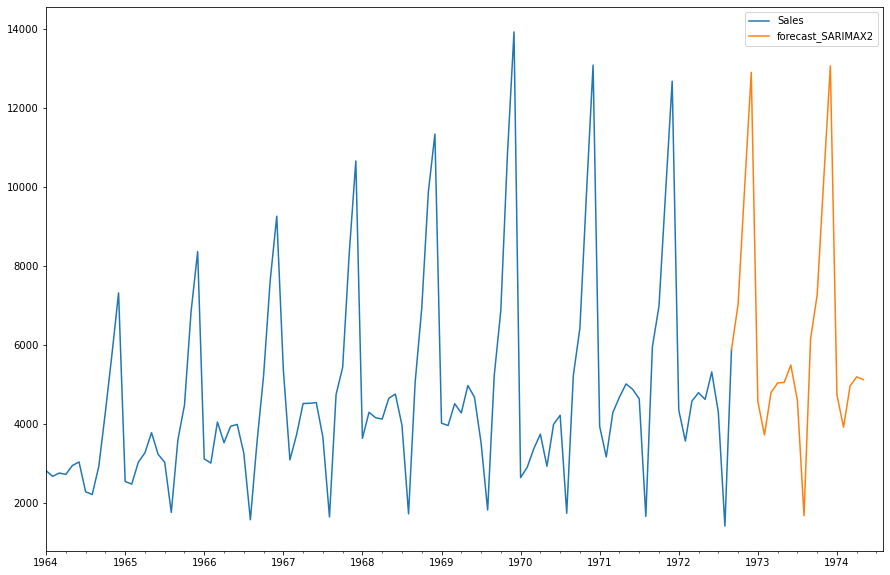

In [76]:
future_df[['Sales','forecast_SARIMAX2']].plot(figsize=(15,10))